In [1]:
import pandas as pd

In [10]:
df=pd.read_csv('train.csv')
df.head()

,dbfs,rms,avg,mode,std,dcoffset,filename,target
0,-23.342901,0.068081,9.726773e-06,0.000000,0.068081,0.000000,BPCRGRYCXPI,silent
1,-32.613091,0.023555,-1.376716e-05,-0.033556,0.023555,-0.000061,UE4OHIQ6JJO,noise
2,-33.918120,0.020217,-2.388173e-05,-0.020961,0.020217,-0.000061,N0B0Z81N2KQ,noise
3,-28.287812,0.038521,-2.014348e-06,0.000122,0.038521,-0.000031,IL6D7IEAKXH,silent
4,-24.189081,0.061746,-6.716756e-07,-0.000122,0.061746,-0.000031,6VKOI64H5QS,silent


In [11]:
df.drop(labels='filename',axis=1)

,dbfs,rms,avg,mode,std,dcoffset,target
0,-23.342901,0.068081,9.726773e-06,0.000000,0.068081,0.000000,silent
1,-32.613091,0.023555,-1.376716e-05,-0.033556,0.023555,-0.000061,noise
2,-33.918120,0.020217,-2.388173e-05,-0.020961,0.020217,-0.000061,noise
3,-28.287812,0.038521,-2.014348e-06,0.000122,0.038521,-0.000031,silent
4,-24.189081,0.061746,-6.716756e-07,-0.000122,0.061746,-0.000031,silent
...,...,...,...,...,...,...,...
1995,-30.466769,0.029989,-1.134274e-05,0.000305,0.029989,-0.000031,silent
1996,-33.258062,0.021791,-2.203779e-05,-0.062787,0.021791,-0.000022,noise
1997,-25.300599,0.054325,-3.338114e-03,-0.003296,0.054223,-0.003357,silent
1998,-14.004087,0.200655,-6.724937e-06,-0.427449,0.200655,-0.000031,noise


In [17]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=2f0aac727af266d5f3fdd7d9cf0444ea4b3978c3a53ff3ab51b194b41af7e893
  Stored in directory: c:\users\suman mohanty\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


You should consider upgrading via the 'c:\users\suman mohanty\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [19]:
l=['dbfs','rms','avg','mode','std','dcoffset']
X=df[l]
y=df.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
# import the class
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [21]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[193,  53],
       [  1, 253]], dtype=int64)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

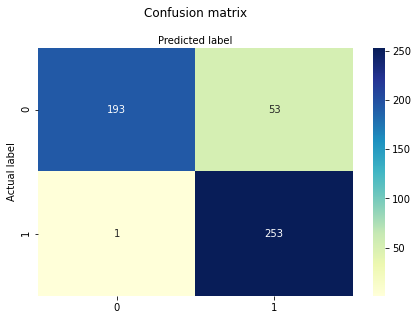

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.892


In [32]:
df=pd.read_csv('validation.csv')
df.head()
df.drop(labels='filename',axis=1)
X=df[l]
Y=df.target
y_pred=logreg.predict(X)
print("Accuracy:",metrics.accuracy_score(Y, y_pred))

Accuracy: 0.934
